In [1]:
# libraries - half are aliased
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import json

# About The Data

This data is the overview of a custom design shop specializing in shoes. All data has been created using Mockaroo.com and Google Sheets, as well as various csv-json conversion sites.

I have created this project with the idea that someone has a custom shoe design 'side hustle' they tend to. After successfully tending to over 100 customers over the course of approximately three years, I have decided to deep dive into the data to discover insight that may help lead to identifying where my market exists and where to look for investors. 

In the future, there could be a storefront, and this data will help determine where that storefront would potentially be most profitable.

-------------------------------------------------------------------------------------



Some fun nuance exists and assumptions are to be made:

1. Any and all items priced below  250.00 must be assumed to be shoe adornments.
    
    - My favorite styles for customizable shoes cannot be purchased for less than the standard box price of 250.00. 
    - Prices include taxes and shipping respectively


2. We can assume the possibilty exists within the data for the customer address fields to not be the same as the delivery address fields.
   
    - Two assumptions available from this include 1) gifts and 2) fraud.
        - Likewise, may not be assumed that 'delivery customer first' will always match 'customer first'.

3. The 'shoes' column contains only unique values; the assumption exists that each order is an individual, one-of-a-kind shipment that cannot be reproduced.

    - All sales without an SKU are customized shoes. 
    - All sales with an SKU are unique hand-designed hardware adornment pieces to decorate a pair of shoes already owned.
    

### I will start with some DataFrames using the Pandas library

This will aid in gaining a deep understanding of the data presented to me.

Currently, all of my information regarding the design company's customers, deliveries, and financial statements are spread across several different files and file formats. I must pull them into dataframes for easy manipulation. 

In [2]:
# Each file will be placed into its own respective DataFrame
customer_df = pd.read_csv('customer.csv')
delivery_df = pd.read_csv('delivery.csv')
profit_df = pd.read_json('profit.json')

# I want an idea of how frequently orders were sold at which price ranges

This will give me an overall idea of the general price range I may be focusing on in the future. 

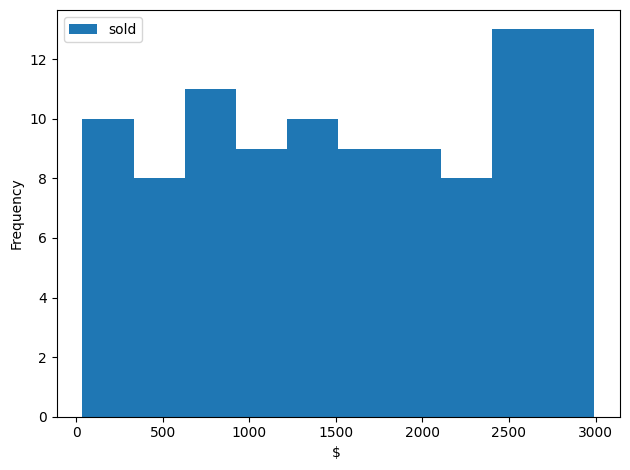

In [3]:
# create profit dataframe
freq_sold_df = profit_df.copy()

# establish histogram that shows which price ranges of purses had the most sales
fs_gram = freq_sold_df.plot(kind= 'hist', x = 'design', y= 'sold')

# label x axis
plt.xlabel('$ ')


# clean output 
plt.tight_layout()

# This graph says over the course of 100 customers, 
# each bar displays the cost at which each customer purchased a custom design

Wow. So this tells me I sold over 12 orders that were at both of my highest price ranges. I don't have to worry that I'm overpricing my items, but from this visual I would like to believe that I will also have room to continue selling adornments and easier designs in the future. 

### This has me questioning my average sale price per state

In [4]:
# establish clean dataframe displaying average price sold per state
state_averages = delivery_df.copy().groupby('state')[['sold']].mean()

# sort that dataframe in order of average price sold 
# round state averages to 2 decimal places
state_averages = round(state_averages.sort_values('sold', ascending=False), 2)

display(state_averages)

,sold
state,
Georgia,2641.08
Minnesota,2097.40
Florida,1679.62
California,1603.76
Wisconsin,1469.30
Michigan,1401.26
Alabama,926.12
Louisiana,882.35
Oregon,682.00


As far as the average sale price, I'm clearly selling a lot of shoes. 

What about my underlying adornment market, though?

I know that anywhere I made a sale at less than 250.00 dollars, I did not sell a pair of shoes but instead a handmade adornment piece for shoes someone already owned. 


For adornment pieces, I might have a less standard process than I would follow if simply designing a stock pair of shoes. The customer may have specific colors or characters they request, which is typical, but these pieces are more like construction-set creations than paintings. They are a bit more involved and restrictive given the pieces I have to work with and the requests that may come in. 

It's a bit of a niche market, and I have to ensure I have a solid fan base and profit to continue this area of my business.

I also know that within my profit dataset, no SKU available means I bought shoes to design instead. I had a 100 customers total, so let me see how many adornment pieces were ordered out of those. 

In [5]:
# create a variable holding a copy dataframe for clean working space
adornments_df = profit_df.copy()

# create dataframe with adornments only and reset index to 0
adornments_df = adornments_df.dropna().reset_index()

# display specific columns (Customer, purse, and price for which the piece sold)
adornments_df = adornments_df.iloc[:, [1, 3, 4, 6]]

# to make it easier to count at a glance, I want to restart the index at 1
adornments_df.index = np.arange(1, len(adornments_df) +1 )

print(adornments_df)

   customer_id  design    sold  bought
1            4     873  208.87   50.23
2           25     454   37.19   10.99
3           40     749   63.65   10.99
4           67     740   50.64   10.99
5           76     436  227.95   50.23
6           89     883  106.53   31.23
7           91     756  132.39   50.23
8           93     838   52.56   10.99
9           94     936  132.34   50.23


I had exactly 9 customers that I sold adornments to! Okay, so definitely not my cash cow currently, but that is almost ten percent of my customer base.

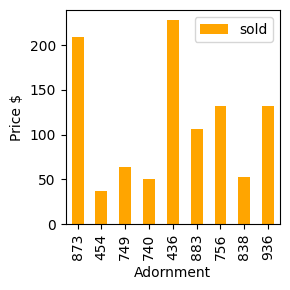

In [6]:
# establish bar graph for overall idea of adornment profitability
adorn_graph = adornments_df.plot(kind="bar", 
                                 x="design", 
                                 y="sold",  
                                 color = 'orange', 
                                 figsize=(3,3)) 

#label x and y
adorn_graph = plt.xlabel('Adornment')
adorn_graph = plt.ylabel('Price $')

# clean output 
plt.tight_layout()

#This bar graph displays all nine adornment pieces by identification number and approximately how much each sold for

Judging by this graph, I may have room to increase my prices on my shoe adornment prices. Only two sold for over 150.00 dollars, but I might want to consider rounding out my price range of my lowest-priced adornments closer to 100.00 than 50.00 dollars.

# Time to break down my adornment piece investors by state

In [7]:
# establish adornment profit
adornment_profit = profit_df.copy().dropna().reset_index()

# create function 
def prof_num(sold, bought):
    return sold - bought

# create a dataframe that includes a 'Total Profit' column 
adornment_profit['Total Profit'] = adornment_profit.apply( 
    lambda x: prof_num(x['sold'], x['bought']), axis=1)

# I only want to see customer_id and total profit in my resulting df
adornment_profit = adornment_profit.iloc[:, [1, 9]]
display(adornment_profit)

,customer_id,Total Profit
0,4,158.64
1,25,26.20
2,40,52.66
3,67,39.65
4,76,177.72
5,89,75.30
6,91,82.16
7,93,41.57
8,94,82.11


In [8]:
# I need to grab the state of my customer, held in the customer dataframe
# I only want to include 'customer_id' and 'state' of purchase only from that customer dataframe
# I need to combine the previous dataframe and one I created
state_adornment_profit = pd.merge(adornment_profit, 
                                  customer_df.copy()[['customer_id','state']], 
                                  on='customer_id', how='left')

display(state_adornment_profit)

,customer_id,Total Profit,state
0,4,158.64,California
1,25,26.20,Alabama
2,40,52.66,California
3,67,39.65,Alabama
4,76,177.72,Oregon
5,89,75.30,Louisiana
6,91,82.16,Wisconsin
7,93,41.57,Florida
8,94,82.11,Louisiana


In [9]:
# I want to see total profit by state for my adornment pieces
adorn_total_profit_state = state_adornment_profit.copy()

# I want to see the state and total profit, but sum the profit per state
adorn_total_profit_state = adorn_total_profit_state.groupby('state')['Total Profit'].sum()

adorn_total_profit_state # outputs series

state
Alabama        65.85
California    211.30
Florida        41.57
Louisiana     157.41
Oregon        177.72
Wisconsin      82.16
Name: Total Profit, dtype: float64

In [10]:
# I want to add those profit totals together
# first gather the totals into a list
gather_profit_states_adorned = adorn_total_profit_state.to_numpy()

# add all the numbers of the list together
total_adornment_profit = gather_profit_states_adorned.sum()

#create labels
states_list = adorn_total_profit_state.keys().tolist()

print("Total profit from selling shoe adornments amounts to  ------->  $",total_adornment_profit)

Total profit from selling shoe adornments amounts to  ------->  $ 736.01


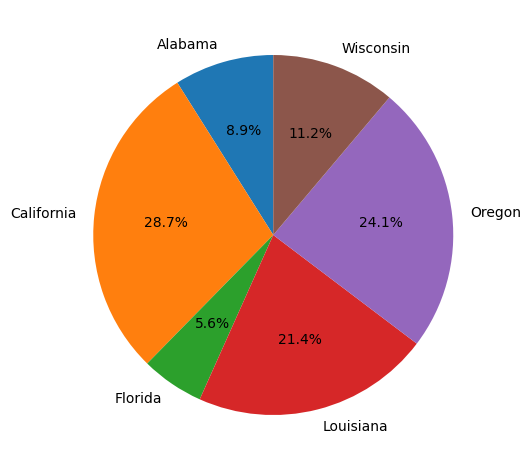

In [11]:
# What's that look like as a pie chart?

st_adorn_pie = plt.pie(gather_profit_states_adorned, 
                       labels=states_list, 
                       startangle=90, 
                       autopct='%.1f%%')

plt.tight_layout()

# Time to calculate total profit from each order

In [37]:
# establish working df
profit = profit_df.copy()


# take care of the missing SKU values
profit = profit.fillna(0) # I know 0 is an invalid SKU number, so it will work here for now.


# now let's cast sku from float to integer like it should be
profit['sku'] = profit['sku'].astype(int)
    
    
# create dataframe with profit column    
profit['Total Profit'] = profit.apply( 
    lambda x: prof_num(x['sold'], 
                       x['bought']), axis=1) 


profit.head(10) # display only ten results

,customer_id,package,design,sold,payment,bought,sku,brand,Total Profit
0,1,P1,416,1396.85,mastercard,250.00,0,NK,1146.85
1,2,P2,293,1741.29,mastercard,250.00,0,NK,1491.29
2,3,P3,888,476.13,mastercard,250.00,0,NK,226.13
3,4,P4,873,208.87,mastercard,50.23,11003234,,158.64
4,5,P5,627,900.88,mastercard,250.00,0,NK,650.88
5,6,P6,975,742.84,mastercard,250.00,0,NK,492.84
6,7,P7,271,1720.90,visa,250.00,0,NK,1470.90
7,8,P8,157,857.19,mastercard,250.00,0,NK,607.19
8,9,P9,244,1792.40,mastercard,250.00,0,NK,1542.40
9,10,P10,426,1660.81,visa,250.00,0,NK,1410.81


### I realize I only accept certain card types, but I want a quick overview of how they compare.

In [38]:
# hold the payment column in a variable
cards = profit['payment']

# every time 'mastercard' appears in the column, 
# it is counted as a 1 and then added together
# and produced as an integer type
mastercards = int(cards.str.count('mastercard').sum())

# again, 'visa' is counted as a 1
# every time it appears in the payment column
# and all those 1's are added together
# that sum is cast into an integer and held in the visacards variable. 
visacards = int(cards.str.count('visa').sum())

print("My Business Accepted A Total of:", end='\n \n')
print(mastercards, "Mastercards")
print(visacards, "Visa Cards")

My Business Accepted A Total of:
 
90 Mastercards
10 Visa Cards


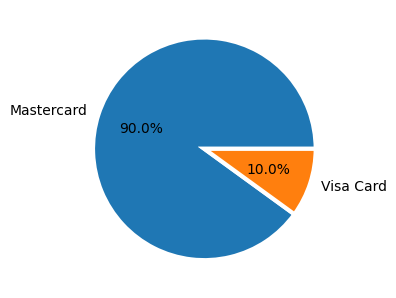

In [14]:
# Cannot insert magical numbers. 
# Must convert int values from block above into matplotlib friendly format

# create list for np array
card_list = []

# insert numeric values for the array
card_list = [mastercards, visacards]

# create pie chart labels
labels = ['Mastercard', 'Visa Card']


# create array
card_chart = np.array(card_list)

# make pie chart smaller
fig, ax = plt.subplots(figsize=(4, 4))

# show card chart array with labels and percentages
plt.pie(card_chart, labels=labels, autopct='%.1f%%',
        # display wedge separation 
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
        # text pieces
       textprops={'size': 'medium', 'color': 'k'})

# remove extra text
plt.tight_layout()

In [15]:
# create clean new variable to hold dataframe
profit_statement = profit

# display only necessary columns
profit_statement = profit_statement.iloc[:, [0, 2, 6, 8]]

display(profit_statement)

,customer_id,design,sku,Total Profit
0,1,416,0,1146.85
1,2,293,0,1491.29
2,3,888,0,226.13
3,4,873,11003234,158.64
4,5,627,0,650.88
...,...,...,...,...
95,96,376,0,1025.94
96,97,289,0,649.91
97,98,831,0,821.91
98,99,214,0,986.24


# Again, I need an idea of which states the income came from.

In [16]:
# I need to grab the state of my customer, held in another dataframe
# I only want to include 'customer_id' and 'state' of purchase only from that customer dataframe
# I need to combine the previous dataframe and one I just created
total_profit_by_state = pd.merge(profit_statement, 
                                 customer_df.copy()[['customer_id','state']], 
                                 on='customer_id', how='left')

display(total_profit_by_state)

,customer_id,design,sku,Total Profit,state
0,1,416,0,1146.85,Florida
1,2,293,0,1491.29,California
2,3,888,0,226.13,Florida
3,4,873,11003234,158.64,California
4,5,627,0,650.88,Florida
...,...,...,...,...,...
95,96,376,0,1025.94,Florida
96,97,289,0,649.91,California
97,98,831,0,821.91,Florida
98,99,214,0,986.24,Florida


## I decide I want to condense the profit table into a document I can evaluate later.

In [17]:
#send to csv
total_profit_by_state.to_csv(r'info/total_profit_by_state.csv', 
                             index= False) #do not include index in file

# I want a deeper look at profit by state

In [18]:
# which state was the item ordered from
state_pivot = total_profit_by_state.copy()

# create a pivot table grouping 'Total Profit' by states
# give me an average of the sales for that state
# cast the result into a number rounded up to two decimal points
state_pivot = round(state_pivot.groupby('state')[['Total Profit']].mean(), 2)

# sort by profit instead of alphabetical order of states
state_pivot = state_pivot.sort_values('Total Profit', ascending=False)

# list of states in order of most profitable to least
display(state_pivot)

,Total Profit
state,
Georgia,2141.08
Minnesota,1691.15
Florida,1325.80
California,1282.68
Michigan,1101.26
Wisconsin,944.18
Alabama,755.79
Louisiana,684.67
Oregon,406.88


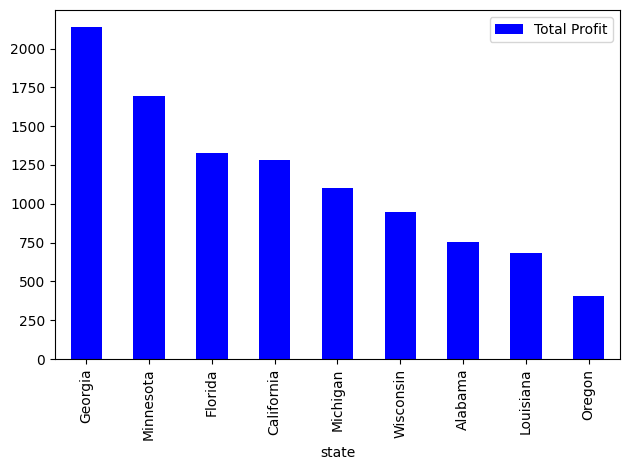

In [19]:
# establish bar graph for overall idea of adornment profitability
state_pivot_graph = state_pivot.plot(kind='bar', color='b')

# clean output 
plt.tight_layout()

# This bar graph displays each state I did business in
# For each state, approximately how much profit was made from custom designs and shoe adornments combined

# Let's get a look into my investors

I've spent a lot of time getting into profits, but that wouldn't exist without my wonderful supporters. 

I need to find a way to get to know them. I may want to send marketing materials for my future endeavors.

It's time to bring in my database. 

In [60]:
# establish database connection
conn = sqlite3.connect('testing.db')

# create cursor to execute sql
click = conn.cursor()



### Establish Customer Table

In [61]:
# delete table if already present / establish fresh, clean start to file when working in Kernal > 'Restart & Run All' order
click.execute('''DROP TABLE IF EXISTS customer''')

# create customer table
click.execute('''CREATE TABLE customer (
    customer_id INTEGER PRIMARY KEY,
    first VARCHAR(25) NOT NULL,
    last VARCHAR(25) NOT NULL,
    email VARCHAR(75) NOT NULL,
    street VARCHAR(25) NOT NULL,
    city VARCHAR(50) NOT NULL,
    state VARCHAR(15) NOT NULL,
    zip_code INTEGER NOT NULL,
    birthdate DATE NOT NULL,
    payment REAL NOT NULL
)''')

# I know I want to access the csv file and hold that value here in python
# customer_sheet = open('customer.csv')

# I also know python has to read the file that I open
# customer_contents = csv.reader(customer_sheet)



# A 'with-block' means the file automatically closes
with open('customer.csv', 'r') as f:
    # customer_sheet will hold the value of the csv being parsed
    # reader throws an error
    # Dictreader provides a fieldname parameter I can iterate over
    customer_sheet = csv.DictReader(f)
    
    # list comprehension time! 
    
    # iterate over my csv and store each value
    # by corresponding header fields
    data_customer = [(i['customer_id'], 
                      i['first'], 
                      i['last'], 
                      i['email'], 
                      i['street'], 
                      i['city'], 
                      i['state'], 
                      i['zip_code'], 
                      i['birthdate'], 
                      i['payment']) for i in customer_sheet]


#### Insert Data for Customer Table

In [62]:
# as for the database
# INSERT INTO customer table the column names and corresponding values per column
customer_insertion = '''INSERT INTO customer 
        (customer_id, 
        first, 
        last, 
        email, 
        street, 
        city, 
        state, 
        zip_code, 
        birthdate, 
        payment) 
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''

# for sql to insert all data points parsed from the csv
click.executemany(customer_insertion, data_customer)

conn.commit() #necessary to save changes to the customer table

### Establish Delivery Table

In [63]:
# delete table if already present
click.execute('''DROP TABLE IF EXISTS delivery''')

# create table in database
click.execute('''CREATE TABLE delivery (
    package TEXT,
    customer_id INTEGER PRIMARY KEY,
    ordered TIMESTAMP,
    delivered TIMESTAMP,
    payment VARCHAR(25),
    sold REAL,
    first TEXT NOT NULL,
    last TEXT NOT NULL,
    street VARCHAR(75) NOT NULL,
    city TEXT,
    state TEXT, 
    zip_code INTEGER,
    design INTEGER
)''')

# open, read, and store information within delivery csv
with open('delivery.csv', 'r') as file:
    delivery_sheet = csv.DictReader(file)
    data_delivery = [(i['package'], 
                      i['customer_id'], 
                      i['ordered'], 
                      i['delivered'], 
                      i['payment'], 
                      i['sold'], 
                      i['first'], 
                      i['last'], 
                      i['street'], 
                      i['city'], 
                      i['state'], 
                      i['zip_code'], 
                      i['design']) for i in delivery_sheet]


# insert delivery values to database
delivery_insertion = '''INSERT INTO delivery (package, 
    customer_id, 
    ordered, 
    delivered, 
    payment, 
    sold, 
    first, 
    last, 
    street, 
    city, 
    state, 
    zip_code, 
    design) 
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''

# execute changes to database
click.executemany(delivery_insertion, data_delivery)

conn.commit() #necessary to save changes within the database to the delivery table

### Establish Profit Table for Database

Now I need to insert my profit table for my database so that I can get an idea of how profitable this business has been for me. 

Instead of a csv, I have a JSON formatted file to work with. Thankfully, the process is mostly the same!

In [64]:
# delete table if already present
click.execute('''DROP TABLE IF EXISTS profit''')

# create profit table
click.execute('''CREATE TABLE profit (
    customer_id INTEGER,
    package TEXT,
    design INTEGER,
    sold REAL,
    payment VARCHAR(25),
    bought REAL, 
    sku INTEGER, 
    brand TEXT
)''')

# Need python to open the file, look at it, and hold the values from the file
with open('profit.json', 'r') as fj:
    profit_sheet = json.load(fj)
    data_profit = [(i['customer_id'], 
                    i['package'], 
                    i['design'], 
                    i['sold'], 
                    i['payment'], 
                    i['bought'], 
                    i['sku'], 
                    i['brand']) for i in profit_sheet]


# hold value for insert statement for easier legibility 
profit_insertion = '''INSERT OR IGNORE INTO profit(
    customer_id, 
    package, 
    design, 
    sold, 
    payment, 
    bought, 
    sku, 
    brand) 
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)'''

# make changes
click.executemany(profit_insertion, data_profit)


conn.commit() #necessary to save changes within the database to the delivery table

#### I need to ensure all the data went to my database!

In [65]:
# I need a query to ask my database how many records exist in my customer table
customer_cells = ('''SELECT COUNT(*) FROM customer''')

# a variable to hold the query execution
customer_rows = click.execute(customer_cells).fetchall()

# method to keep count of the iterations for query
# for how many times in customer_rows the query executed
for c in customer_rows:
    
    # I need to print the informtion I query for
    print(c)

(100,)


In [66]:
# I want a better view than that. Let's clean that up!

# Let's use some string formatting
fmt = "{0}" # string creation; indexed placeholder for item I want returned so that I can format it

for cr in customer_rows:
    
    # hold the format for each iteration
    customer_tc = int(fmt.format(*cr)) #integer casting for easy adding of the variable elsewhere
    
    print(customer_tc, "Rows ---> customer database")

100 Rows ---> customer database


In [67]:
for d in click.execute('''SELECT COUNT(*) FROM delivery''').fetchall():
    
    delivery_tc = int(fmt.format(*d)) 
    
    print(delivery_tc, "Rows ---> delivery database")

100 Rows ---> delivery database


In [68]:
for pr in click.execute('''SELECT COUNT(*) FROM profit''').fetchall():
    
    profit_tc = int(fmt.format(*pr))
    
    print(profit_tc, "Rows ---> profit database")

100 Rows ---> profit database


In [69]:
print((customer_tc+delivery_tc+profit_tc),"----> Must equal 300 to be correct")

300 ----> Must equal 300 to be correct


Perfect! So I know that all 300 lines of data have been successfully entered into my database. 


For my first order of business, I want to send a personalized follow-up gift thanking each customer for their purchase. I decide my preferred method of going about this task is to send a birthday gift to everybody.  

# Let's invest time into my investors' birthdays

In [30]:
# query everybody's birthday
birthday_list = ('''SELECT first, birthdate
                FROM customer
                ORDER BY birthdate''')

# view query
fmt_two = "{0}--> {1}"
for r in click.execute(birthday_list).fetchall():
    birthday_list = fmt_two.format(*r)
    print()           ##extra space in case easier to view
    print()
    print(birthday_list)



Penni--> 1930-01-03


Raymund--> 1930-10-02


Adelle--> 1932-01-24


Hugues--> 1933-09-09


Chevy--> 1935-01-28


Umberto--> 1935-04-10


Hana--> 1935-11-19


Alisander--> 1936-09-18


Harbert--> 1937-08-21


Karissa--> 1938-10-04


Pierson--> 1939-12-20


Clayton--> 1940-01-26


Doy--> 1940-05-18


Claretta--> 1941-02-22


Licha--> 1941-05-28


Tersina--> 1941-10-27


Rustin--> 1942-06-18


Harriott--> 1943-03-31


Gaile--> 1944-07-12


Fowler--> 1945-01-31


Ginger--> 1946-08-24


Fonz--> 1946-11-05


Marin--> 1948-06-20


Darryl--> 1949-03-26


Clemence--> 1949-09-15


Garrot--> 1950-03-11


Matilde--> 1950-04-10


Branden--> 1951-11-27


Perrine--> 1952-11-22


Jehu--> 1953-05-08


Christean--> 1953-10-18


Aloysius--> 1955-06-26


Matias--> 1957-04-16


Celie--> 1957-06-11


Kara--> 1958-12-05


Chryste--> 1959-12-15


Tadeas--> 1961-04-12


Kara-lynn--> 1962-01-09


Jody--> 1962-10-04


Kare--> 1962-12-23


Rivkah--> 1963-05-05


Grannie--> 1966-02-02


Kayle--> 1966-06-20


Vi

### Let me do a quick check to ensure I'm not sending out multiple gift cards to the same customer. 

In [31]:
email_query = '''SELECT DISTINCT COUNT(email) FROM customer'''


for emq in click.execute(email_query).fetchall():
    total_unique_emails = fmt.format(*emq)
    print("Exactly --->",total_unique_emails, " \b<--- emails exist in this database and are unique.")

Exactly ---> 100  <--- emails exist in this database and are unique.


In [32]:
names_match_query =''' SELECT last  
        FROM customer 
        GROUP BY last 
        HAVING COUNT (last) > 1'''

def matching_last_names(query):
    for nm in click.execute(query).fetchall():
        repeating_last_names = fmt.format(*nm)
        return repeating_last_names
    
matched_names = matching_last_names(names_match_query)

    
#for nm in click.execute(names_match_query).fetchall():
#        repeating_last_names = fmt.format(*nm)
#        return repeating_last_names


print("Which last names repeat in this dataset?")
print(matched_names)

Which last names repeat in this dataset?
None


If no name prints, then I have confirmed that at no point in my customer table does a customer's last name repeat in the dataset, so I doubt I have any duplicate results for the data in my customer table as far as contact information when there are no duplicate last names or email addresses. 

## I have two types of gifts available:

1. All-purpose gift cards with set balances of 15.00 dollars
2. iTunes gift cards with set balances of 15.00 dollars

To help me split the population between these two options, I choose to make an assumption of which to base my condition upon.

I make an assumption that older generations will enjoy general purpose giftcards more than iTunes-specific giftcards. 

In [33]:
# Pretending it's September now, I realize I need to filter by month as well. 
# I'm going to start now, looking at October. 

# sql query
query_october_cards = ('''SELECT first, birthdate, email
                FROM customer
                WHERE (birthdate LIKE '%-10-%') AND (birthdate <= '1994-12-31')
                ORDER BY birthdate''')
em_fmt = "{0}, {1} --> {2} " # style of formatting

# view query result
for octc in click.execute(query_october_cards).fetchall():
    october_cards = em_fmt.format(*octc)
    print(october_cards, end='\n \n')

Raymund, 1930-10-02 --> rpostlethwaite2@nasa.gov 
 
Karissa, 1938-10-04 --> kwannes22@sciencedaily.com 
 
Tersina, 1941-10-27 --> tyoud1v@joomla.org 
 
Christean, 1953-10-18 --> csanchez1d@g.co 
 
Jody, 1962-10-04 --> jwillatts0@wordpress.com 
 
Therese, 1968-10-08 --> tchristmas4@1und1.de 
 
Juliane, 1968-10-29 --> jbirtle25@cnn.com 
 
Aaren, 1984-10-12 --> akemmr@patch.com 
 
Goddart, 1993-10-12 --> grootc@columbia.edu 
 


In [34]:
# Now I'm going to determine the october itunes cards to prepare: 

# sql query
query_oct_itunes = ('''SELECT first, birthdate, email
                FROM customer
                WHERE (birthdate LIKE '%-10-%') AND (birthdate > '1994-12-31')
                ORDER BY birthdate''')

# view query result
for octunes in click.execute(query_oct_itunes).fetchall():
    october_itunes_cards = em_fmt.format(*octunes)
    print(october_itunes_cards)

Merna, 1998-10-19 --> mshakesby1s@flavors.me 


In [75]:
# must be sure to close the database when we finish working with it
conn.close()